In this notebook we will get familiar with parametric machine learning approaches using the Linear Regression Model. Parametric machine learning approaches work by making assumptions about the relationship between the features and the target column. In linear regression, the approximate relationship between the feature columns and the target column is expressed as a linear regression equation:

\begin{equation*}
{y} = {a1x1 + a2x2 + a3x3 + ... + anxn}
\end{equation*}

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

data_file = "AmesHousing.txt"
data = pd.read_csv(data_file,sep='\t')
train = data[0:1460]
test = data[1460:]
target ="SalePrice"
print(data.info())
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
Order              2930 non-null int64
PID                2930 non-null int64
MS SubClass        2930 non-null int64
MS Zoning          2930 non-null object
Lot Frontage       2440 non-null float64
Lot Area           2930 non-null int64
Street             2930 non-null object
Alley              198 non-null object
Lot Shape          2930 non-null object
Land Contour       2930 non-null object
Utilities          2930 non-null object
Lot Config         2930 non-null object
Land Slope         2930 non-null object
Neighborhood       2930 non-null object
Condition 1        2930 non-null object
Condition 2        2930 non-null object
Bldg Type          2930 non-null object
House Style        2930 non-null object
Overall Qual       2930 non-null int64
Overall Cond       2930 non-null int64
Year Built         2930 non-null int64
Year Remod/Add     2930 non-null int64
Roof Style         29

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


- Generate 3 scatter plots in the same column:
  - The first plot should plot the Garage Area column on the x-axis against the SalePrice column on the y-axis.
  - The second one should plot the Gr Liv Area column on the x-axis against the SalePrice column on the y-axis.
  - The third one should plot the Overall Cond column on the x-axis against the SalePrice column on the y-axis.


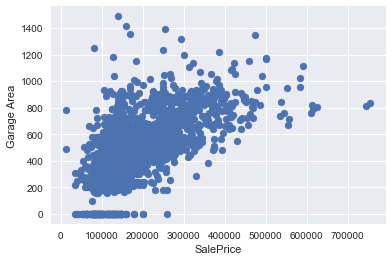

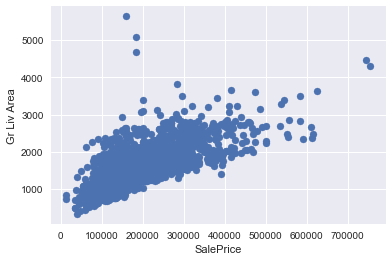

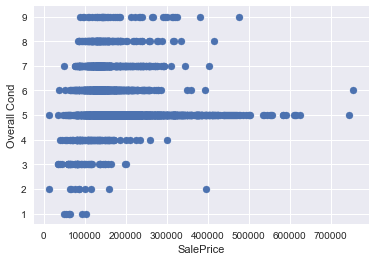

In [11]:
columns = ['Garage Area', 'Gr Liv Area', 'Overall Cond']

for col in columns:
    plt.scatter(data[[target]], data[[col]])
    plt.xlabel(target)
    plt.ylabel(col)
    plt.show()

In [12]:
columns = ['Garage Area', 'Gr Liv Area', 'Overall Cond', 'SalePrice']
data[columns].corr()

,Garage Area,Gr Liv Area,Overall Cond,SalePrice
Garage Area,1.000000,0.484892,-0.153754,0.640401
Gr Liv Area,0.484892,1.000000,-0.115643,0.706780
Overall Cond,-0.153754,-0.115643,1.000000,-0.101697
SalePrice,0.640401,0.706780,-0.101697,1.000000


The correlation between Gr Liv Area and SalePrice is around 0.709 which is the highest. Recall that the closer the correlation coefficient is to 1.0, the stronger the correlation. Here's the updated form of the model -
\begin{equation*}
{\hat{yi}} = {a1*Gr Liv Area + a0}
\end{equation*}



In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

regr = LinearRegression()
regr.fit(train[['Gr Liv Area']], train['SalePrice'])
y_pred = regr.predict(test[['Gr Liv Area']])
print("Coefficients - {}".format(regr.coef_))
print("Intercepts - {}".format(regr.intercept_))
a1 = regr.coef_
a0 = regr.intercept_

print("Mean Squared error: %0.2f"%mean_squared_error(test['SalePrice'],y_pred))

Coefficients - [ 116.86624683]
Intercepts - 5366.821710056043
Mean Squared error: 3259068472.19


The fitted model can be represented as 
\begin{equation*}
{\hat{yi}} = {116.866*x + 5366.8217}
\end{equation*}

-- Where x is the independent variable i.e. Gr Liv Area
One way to interpret this model is " for every 1 square foot increase in above ground living area, we can expect the home's value to increase by approximately 116.87 dollars".

In [14]:
import numpy as np
from sklearn.metrics import mean_squared_error
lr = LinearRegression()
lr.fit(train[['Gr Liv Area']], train['SalePrice'])
train_predictions = lr.predict(train[['Gr Liv Area']])
test_predictions = lr.predict(test[['Gr Liv Area']])
train_rmse =np.sqrt(mean_squared_error(train_predictions,train['SalePrice']) )
test_rmse = np.sqrt(mean_squared_error(test_predictions,test['SalePrice']))
print(train_rmse, test_rmse)

56034.3620014 57088.2516126


So far we have explored the basics of simple linear regression, next we can extend the concept to a multivariate case often called multiple linear regression. A multiple linear regression model allows us to capture the relationship between multiple feature columns and the target column. Here's the formula -

\begin{equation*}
{\hat{yi}} = {a0 + a1x1 + a2x2 + ... + anxn}
\end{equation*}

Let's train the model using the following features -
- Overall Cond
- Gr Liv Area

In [15]:
#
cols = ['Overall Cond', 'Gr Liv Area']

lr = LinearRegression()
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])
train_rmse_2 =np.sqrt(mean_squared_error(train_predictions,train['SalePrice']) )
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions,test['SalePrice']))
print(train_rmse_2, test_rmse_2)

56032.3980153 57066.9077945


#### Feature Selection
In the machine learning workflow, once we've selected the model we want to use, selecting the appropriate features for that model is the next important step. Next we'll explore how to use correlation between features and the target column, correlation between features and variance of features to slect features. 

We'll specifically focus on selecting from feature columns that don't have any missing values or don't need to be transformed to be useful.


In [16]:
#numerical_train = train.select_dtypes(include=['int', 'float'])
numerical_train = train.select_dtypes(include=['int64', 'float64'])
#print(train.columns.tolist())
print(numerical_train.columns.tolist())
numerical_train.isnull().sum()

['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


Order                0
PID                  0
MS SubClass          0
Lot Frontage       249
Lot Area             0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Mas Vnr Area        11
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Bsmt Full Bath       1
Bsmt Half Bath       1
Full Bath            0
Half Bath            0
Bedroom AbvGr        0
Kitchen AbvGr        0
TotRms AbvGrd        0
Fireplaces           0
Garage Yr Blt       75
Garage Cars          0
Garage Area          0
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
Mo Sold              0
Yr Sold              0
SalePrice            0
dtype: int64

- Drop the following columns from numerical_train:
  - PID (place ID isn't useful for modeling)
  - Year Built
  - Year Remod/Add
  - Garage Yr Blt
  - Mo Sold
  - Yr Sold
- Calculate the number of missing values from each column in numerical_train. Create a Series object where the index is made up of column names and the associated values are the number of missing values:
  - Assign this Series object to null_series. Select the subset of null_series to keep only the columns with no missing values, and assign the resulting Series object to full_cols_series.
  - Display full_cols_series using the print() function.
  

In [17]:
numerical_train.drop(['PID', 'Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Mo Sold', 'Yr Sold'], axis=1, inplace=True)

null_series  = numerical_train.isnull().sum()
full_cols_series = null_series[null_series == 0]
print(full_cols_series)

Order              0
MS SubClass        0
Lot Area           0
Overall Qual       0
Overall Cond       0
1st Flr SF         0
2nd Flr SF         0
Low Qual Fin SF    0
Gr Liv Area        0
Full Bath          0
Half Bath          0
Bedroom AbvGr      0
Kitchen AbvGr      0
TotRms AbvGrd      0
Fireplaces         0
Garage Cars        0
Garage Area        0
Wood Deck SF       0
Open Porch SF      0
Enclosed Porch     0
3Ssn Porch         0
Screen Porch       0
Pool Area          0
Misc Val           0
SalePrice          0
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
train_subset = train[full_cols_series.index]
corrmat = train_subset.corr()
sorted_corrs = corrmat['SalePrice'].abs().sort_values()
print(sorted_corrs)

Misc Val           0.009903
3Ssn Porch         0.038699
Low Qual Fin SF    0.060352
Order              0.068181
MS SubClass        0.088504
Overall Cond       0.099395
Screen Porch       0.100121
Bedroom AbvGr      0.106941
Kitchen AbvGr      0.130843
Pool Area          0.145474
Enclosed Porch     0.165873
2nd Flr SF         0.202352
Half Bath          0.272870
Lot Area           0.274730
Wood Deck SF       0.319104
Open Porch SF      0.344383
TotRms AbvGrd      0.483701
Fireplaces         0.485683
Full Bath          0.518194
1st Flr SF         0.657119
Garage Area        0.662397
Garage Cars        0.663485
Gr Liv Area        0.698990
Overall Qual       0.804562
SalePrice          1.000000
Name: SalePrice, dtype: float64


- Select only the columns in sorted_corrs with a correlation above 0.3 and assign to strong_corrs.
- Use the seaborn.heatmap() function to generate a correlation matrix heatmap for the columns in strong_corrs.

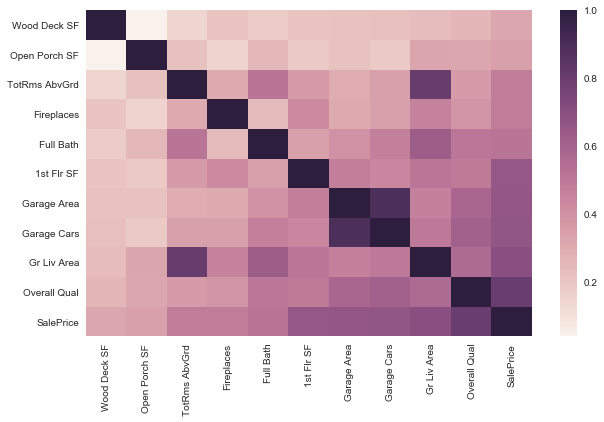

In [25]:
strong_corrs = sorted_corrs[sorted_corrs > 0.3]
plt.figure(figsize=(10,6))
corrmat = train_subset[strong_corrs.index].corr()
seaborn.heatmap(corrmat)